In [3]:
import sklearn.datasets as datasets
import numpy as np
import re
import pandas as pd
import seaborn as sns
import os
from numpy import asarray
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy import stats as st

## Getting our dataset

In [4]:
# Path where our data is located
base_path = "./asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

filename  category
0   z/hand2_z_left_seg_1_cropped.jpeg        35
1    d/hand2_d_bot_seg_4_cropped.jpeg        13
2    q/hand2_q_top_seg_4_cropped.jpeg        26
3    n/hand2_n_dif_seg_5_cropped.jpeg        23
4  t/hand2_t_right_seg_5_cropped.jpeg        29

In [6]:
# Load the images and convert them to numpy arrays
pixel_arrays = []
for i,img in enumerate(df["filename"]):
    img = Image.open(base_path+img)  
    numpydata = asarray(img)
    pixel_arrays.append(numpydata)
df["pixel_data"] = pixel_arrays

In [7]:
df.head()

filename  category  \
0   z/hand2_z_left_seg_1_cropped.jpeg        35   
1    d/hand2_d_bot_seg_4_cropped.jpeg        13   
2    q/hand2_q_top_seg_4_cropped.jpeg        26   
3    n/hand2_n_dif_seg_5_cropped.jpeg        23   
4  t/hand2_t_right_seg_5_cropped.jpeg        29   

                                          pixel_data  
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

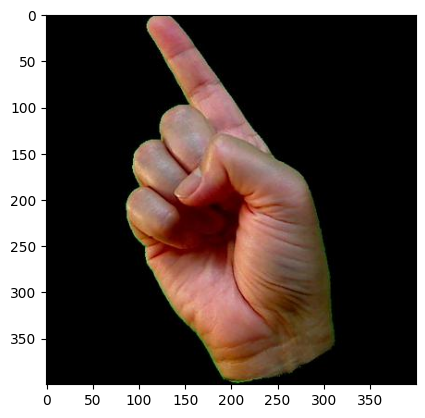

In [8]:
plt.imshow(df["pixel_data"][0])

In [9]:
import numpy as np
import scipy.stats as st

def get_mask(hand_image, v=30):
    '''def get_mask(hand_image,v=30):
    bg = np.array(hand_image[0][:20])
    analysis = st.mode(bg)
    # Find the most popular color in the first 20
    popular_color = analysis.mode
    #print(popular_color)
    # Apply a standard
    mask = np.ones((hand_image.shape[0],hand_image.shape[1]),dtype=np.uint8)
    
    high_cota = [min(255,popular_color[i]+v) for i in range(3)]
    low_cota = [max(0,popular_color[i]-v) for i in range(3)]
    for y,row in enumerate(hand_image):
        for x,px in enumerate(row):
            if (px[0]<=high_cota[0] and px[1]<=high_cota[1] and px[2]<=high_cota[2]) \
             and (px[0]>=low_cota[0] and px[1]>=low_cota[1] and px[2]>=low_cota[2]):
                mask[y][x] = 0
    return mask'''

    # Calculate the most popular color in the first 20 pixels of the first row
    bg = hand_image[0, :20]
    popular_color = st.mode(bg, axis=0).mode[0]
    
    # Define high and low thresholds for each color channel
    high_cota = np.clip(popular_color + v, 0, 255)
    low_cota = np.clip(popular_color - v, 0, 255)
    
    # Create the mask using vectorized operations
    mask = np.all((hand_image >= low_cota) & (hand_image <= high_cota), axis=-1)
    return np.uint8(~mask)  # Convert boolean mask to uint8 (0/1)

    


In [10]:
masks = []
for data in df["pixel_data"]:
    m = get_mask(data)
    masks.append(m)

df["masks"] = masks

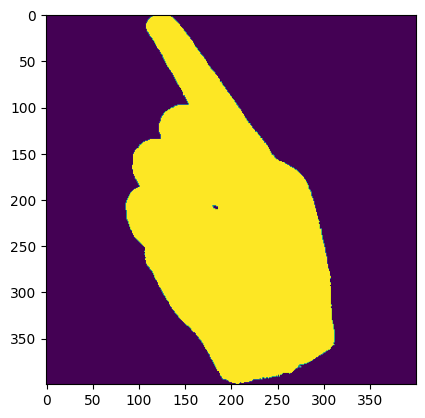

In [11]:
plt.imshow(df["masks"][0])

In [12]:
# Convert the pixel data to grayscale
gray_scale = []
for data in df["pixel_data"]:
    gray_data = data.mean(axis=2)
    gray_scale.append(gray_data.astype(np.uint8))

df["pixel_data"] = gray_scale


In [13]:
df.head()

filename  category  \
0   z/hand2_z_left_seg_1_cropped.jpeg        35   
1    d/hand2_d_bot_seg_4_cropped.jpeg        13   
2    q/hand2_q_top_seg_4_cropped.jpeg        26   
3    n/hand2_n_dif_seg_5_cropped.jpeg        23   
4  t/hand2_t_right_seg_5_cropped.jpeg        29   

                                          pixel_data  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                               masks  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

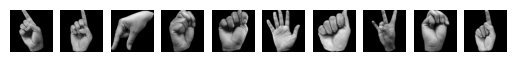

In [14]:
# Visualizar imágenes procesadas
for i in range(10):  # Mostrar las primeras 5 imágenes
    plt.subplot(1, 10, i+1)
    plt.imshow(df["pixel_data"].iloc[i], cmap='gray')
    plt.axis('off')
plt.show()

In [15]:
freq = {}
for cat in df["category"].unique():
    for val in df["category"]:
        if val == cat:
            if cat not in freq:
                freq[cat] = 1
            else:
                freq[cat] += 1
freq.keys()
freq.values()

dict_values([70, 70, 70, 70, 65, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

In [16]:
df["pixel_data"][0].shape

(400, 400)

## Extracting the keypoints

In [17]:

# Function to generate a dense grid of keypoints
def generate_dense_keypoints_mask(image,mask, step_size=8):
    h, w = image.shape
    dense_keypoints = [
        cv2.KeyPoint(x, y, step_size) 
        for y in range(0, h, step_size) 
        for x in range(0, w, step_size)
        if mask[y][x] == 1
    ]
    return dense_keypoints

In [18]:

# Function to generate a dense grid of keypoints
def generate_dense_keypoints(image,step_size=8):
    h, w = image.shape
    dense_keypoints = [
        cv2.KeyPoint(x, y, step_size) 
        for y in range(0, h, step_size) 
        for x in range(0, w, step_size)
    ]
    return dense_keypoints

In [19]:
file = "o/hand5_o_dif_seg_2_cropped.jpeg"

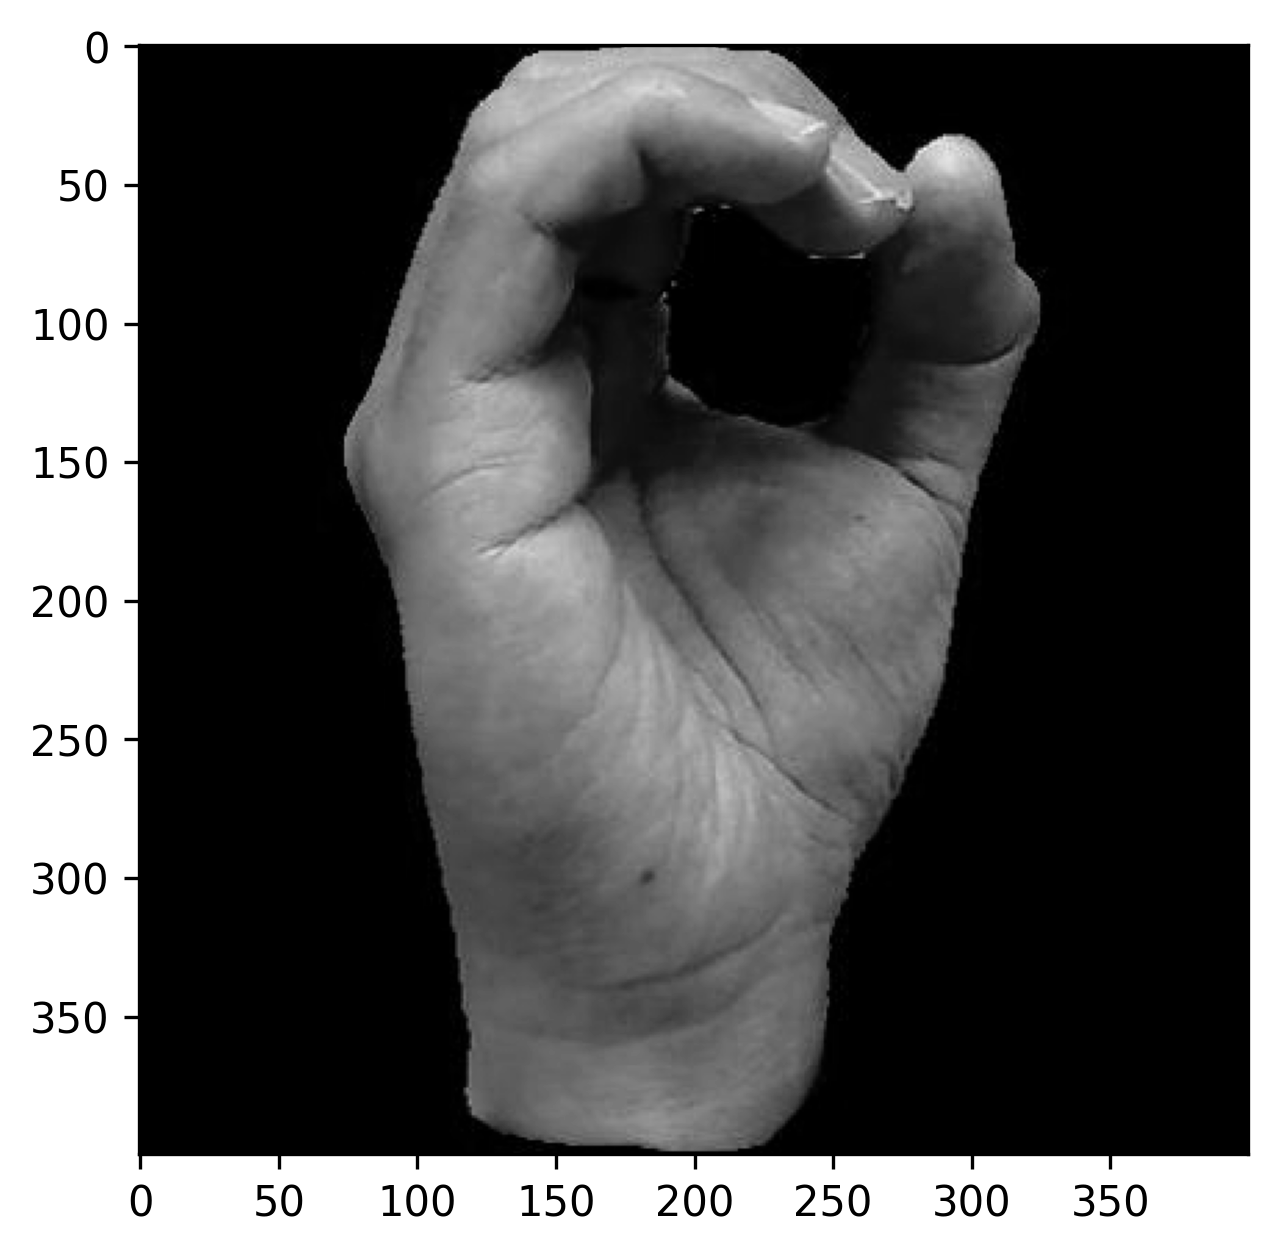

In [20]:
img = df[df["filename"] == file]["pixel_data"].iloc[0]
plt.figure(dpi=300)
plt.imshow(img, cmap='gray')
plt.savefig("original.pdf",format="pdf")

### Version original

In [21]:
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

In [22]:
img = df[df["filename"] == file]["pixel_data"].iloc[0]

kp, des = sift.detectAndCompute(img, None)

keypoints.append(kp)
descriptors.append(des)

[[ 0.  0.  0. ... 17.  3.  0.]
 [12.  0.  0. ...  0.  0. 21.]
 [ 1.  0.  0. ...  0.  0.  2.]
 ...
 [ 1.  0.  0. ... 80.  8.  0.]
 [51.  8.  0. ...  0.  6. 52.]
 [ 3.  1.  0. ...  2.  1.  8.]]


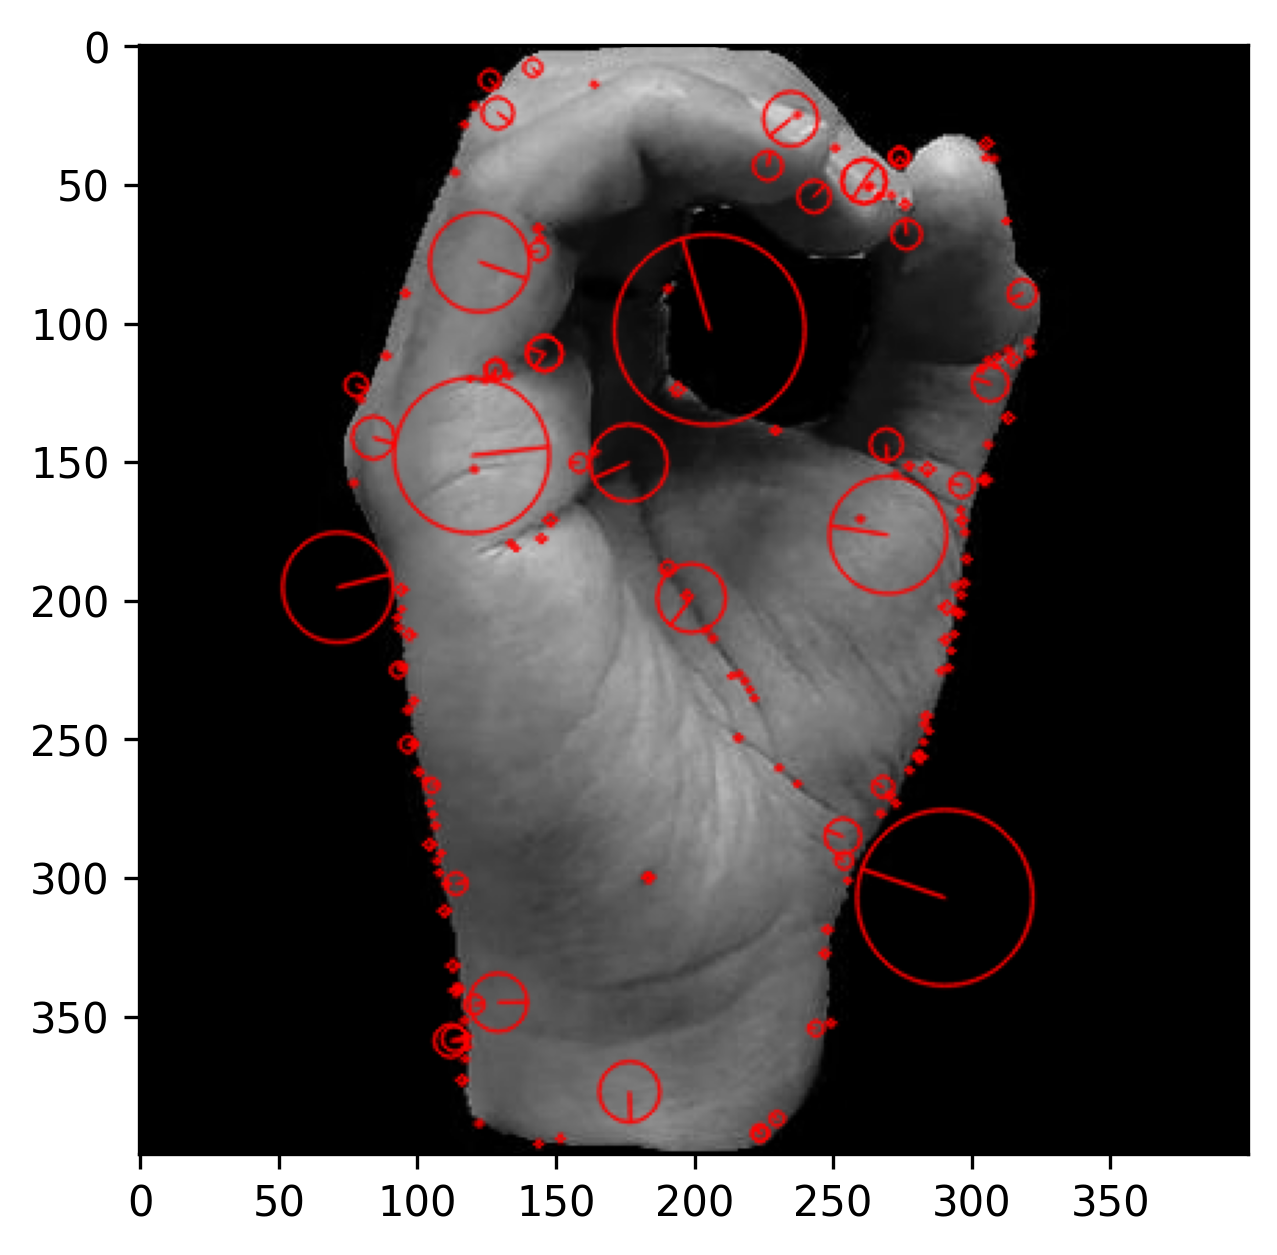

In [23]:
output_image = []

output_image.append(cv2.drawKeypoints(img, keypoints[0], 0, (255, 0, 0),
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.figure(dpi=300)
plt.imshow(output_image[0], cmap='gray')
plt.savefig("Simple_sift.pdf",format="pdf")
print(descriptors[0])

### Versión con dense sift

In [24]:
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

In [25]:
img = df[df["filename"] == file]["pixel_data"].iloc[0]

# Generate mask and dense keypoints
dense_kp = generate_dense_keypoints(img)

_, des = sift.compute(img, dense_kp)

keypoints.append(dense_kp)
descriptors.append(des)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


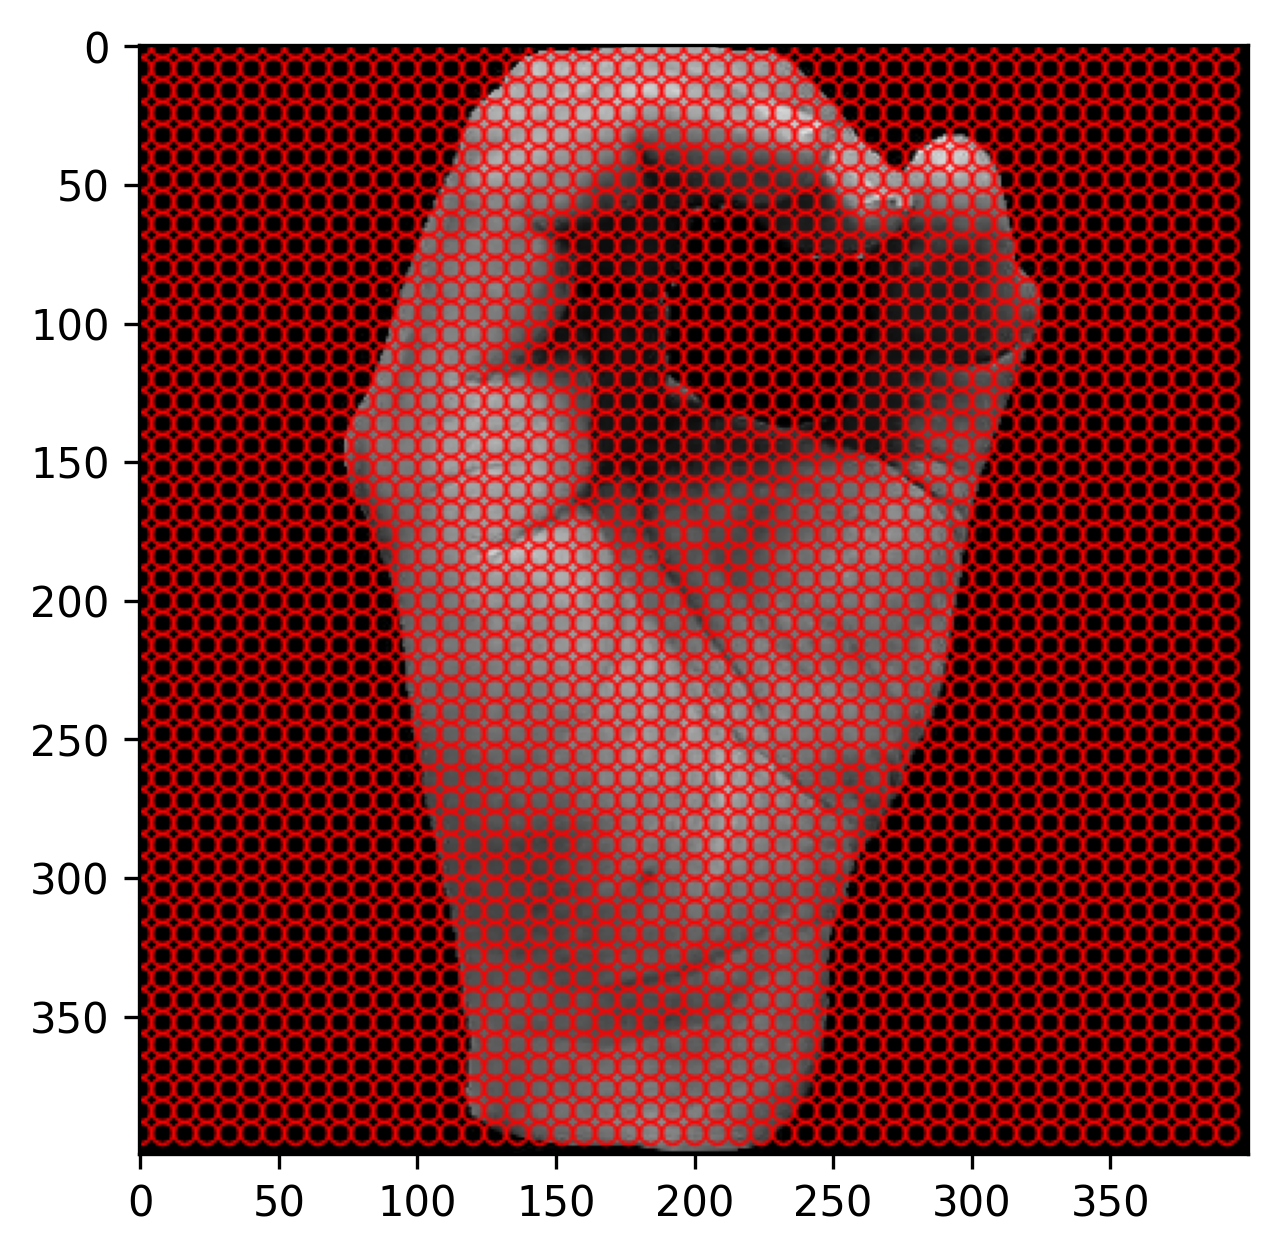

In [26]:
output_image = []

output_image.append(cv2.drawKeypoints(img, keypoints[0], 0, (255, 0, 0),
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.figure(dpi=300)
plt.imshow(output_image[0], cmap='gray')
plt.savefig("Dense_sift.pdf",format="pdf")
print(descriptors[0])

### Versión con Máscara y dense sift

In [27]:
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

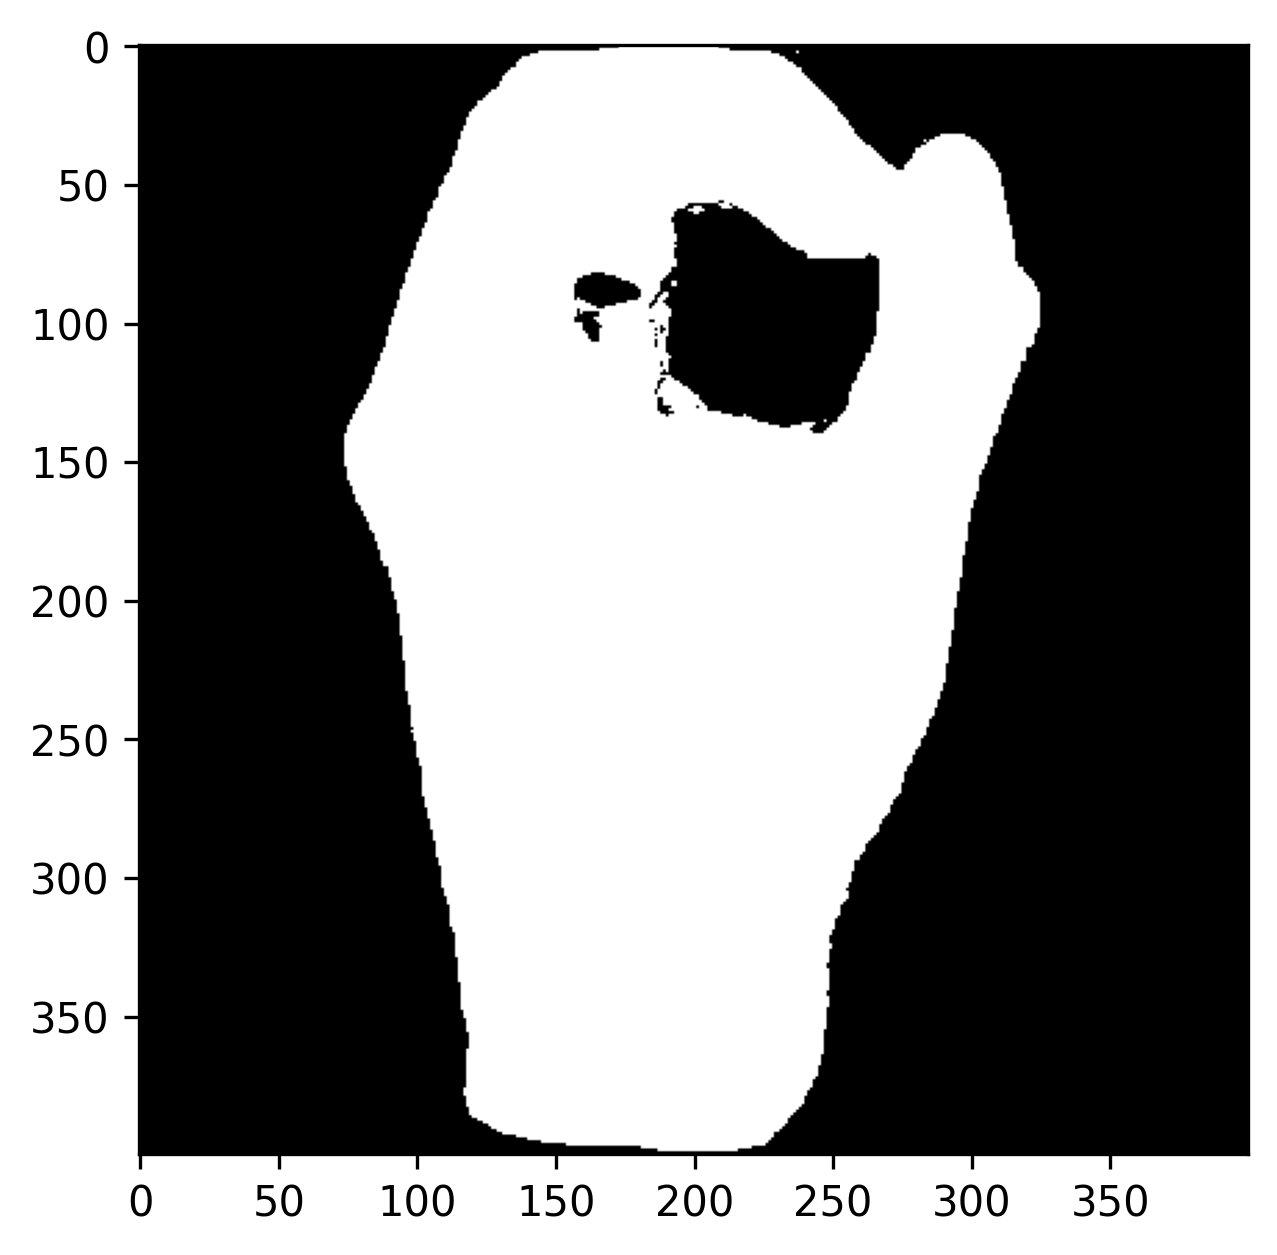

In [28]:
img = df[df["filename"] == file]["pixel_data"].iloc[0]

# Generate mask and dense keypoints
mask = df[df["filename"] == file]["masks"].iloc[0]
dense_kp = generate_dense_keypoints_mask(img,mask)

_, des = sift.compute(img, dense_kp, mask)

keypoints.append(dense_kp)
descriptors.append(des)

plt.figure(dpi=300)
plt.imshow(mask, cmap='gray')
plt.savefig("Mask.pdf",format="pdf")


[[ 0.  0.  0. ... 65. 29.  2.]
 [ 0.  0.  0. ... 91. 22.  0.]
 [ 0.  0.  0. ... 88. 34.  4.]
 ...
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 4.  0.  0. ...  0.  0.  0.]
 [ 5.  1.  2. ...  0.  0.  0.]]


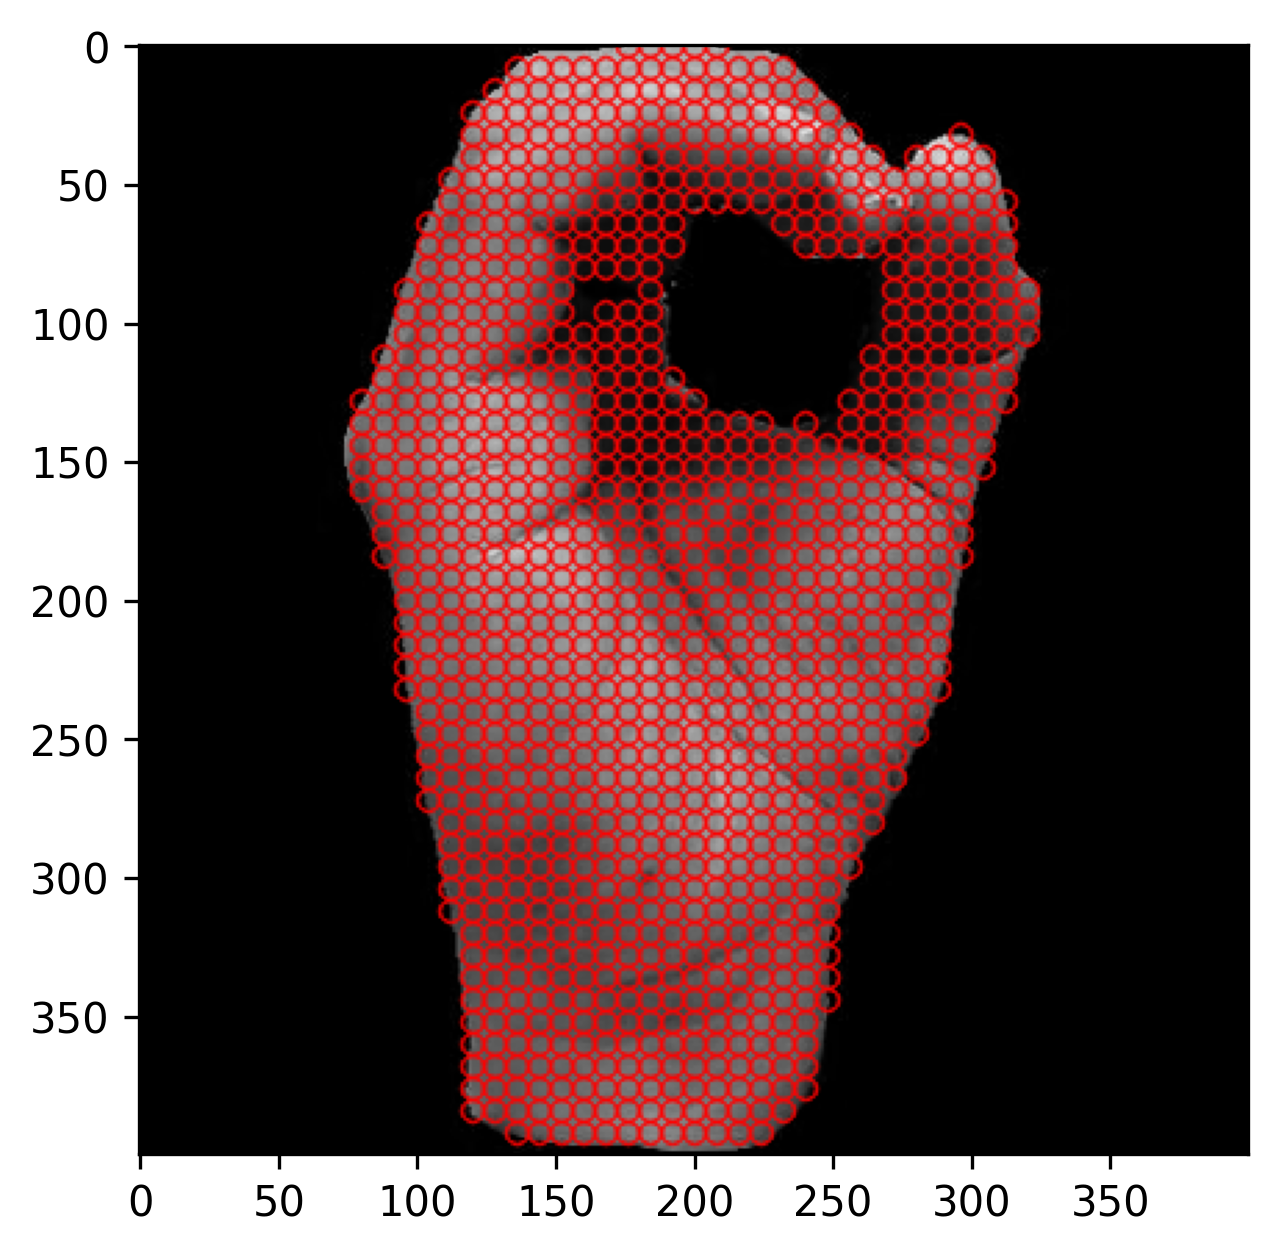

In [29]:
output_image = []

output_image.append(cv2.drawKeypoints(img, keypoints[0], 0, (255, 0, 0),
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.figure(dpi=300)
plt.imshow(output_image[0], cmap='gray')
plt.savefig("Masked_dense_sift.pdf",format="pdf")
print(descriptors[0])